In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from scipy.stats import linregress
from scipy.optimize import curve_fit

</br></br></br>

--------------------

</br>

# Outline

Comparing Indices and GOOG.

</br></br></br>

--------------------

</br>

# GOOG

In [2]:
goog_df = pd.read_csv("csv_files/GOOG.csv")

display(goog_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
5,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132
6,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967
7,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037
8,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734
9,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504


In [3]:
# Conver Date to DateTime Object:
goog_df["DATETIME"] = pd.to_datetime(goog_df["Date"], format="%Y-%m-%d")
goog_df["Day"] = (goog_df["DATETIME"] - goog_df["DATETIME"].iloc[-1]).dt.days

display(goog_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004-08-20,-7539
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004-08-23,-7536
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004-08-24,-7535
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004-08-25,-7534
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,2004-08-26,-7533
5,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132,2004-08-27,-7532
6,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967,2004-08-30,-7529
7,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037,2004-08-31,-7528
8,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734,2004-09-01,-7527
9,2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504,2004-09-02,-7526


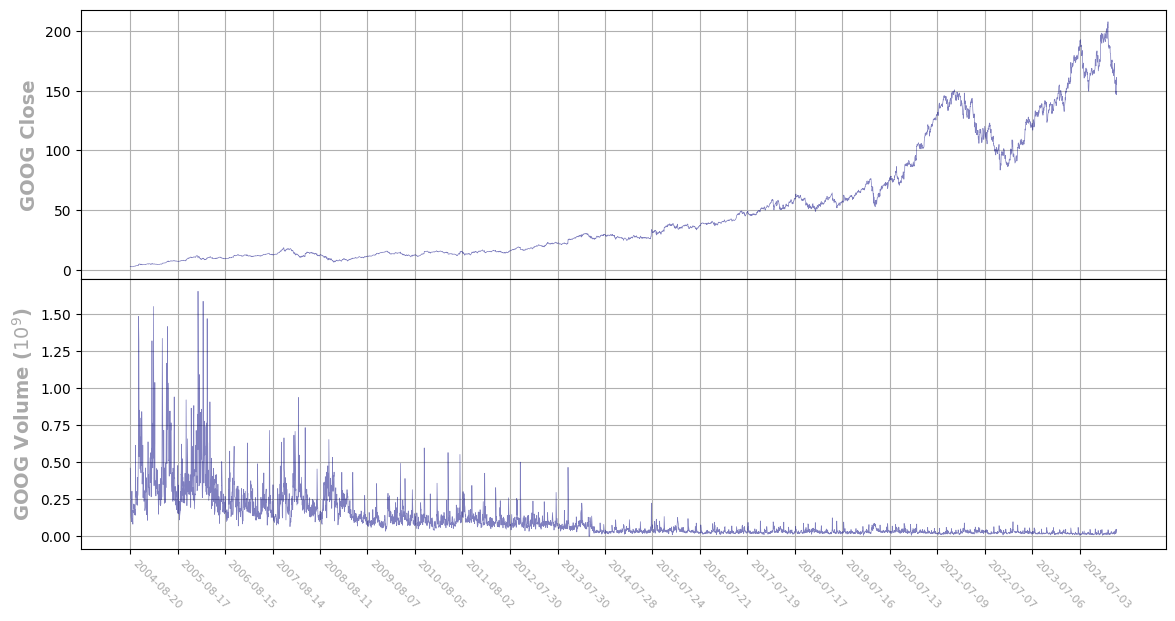

In [4]:
day = goog_df["Day"].to_numpy()
vol = goog_df["Volume"].to_numpy()
close = goog_df["Close"].to_numpy()
dates = goog_df["Date"].to_numpy()

fig = plt.figure(figsize=(14., 7.0))

ax_upper = fig.add_subplot(2,1,1)
ax_upper.set_ylabel("GOOG Close", fontsize=14, fontweight="bold", color="darkgrey")
ax_upper.plot(day, close, lw=0.5, color="navy", alpha=0.5)
# ax_upper.set_xticks(day[::250])
ax_upper.set_xticklabels([]) # dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_upper.grid()
ax_upper.set_axisbelow(True)

ax_lower = fig.add_subplot(2,1,2)
ax_lower.set_ylabel("GOOG Volume ($10^9$)", fontsize=14, fontweight="bold", color="darkgrey")
ax_lower.plot(day, vol * 1.0e-9, lw=0.5, color="navy", alpha=0.5)
ax_lower.set_xticks(day[::250])
ax_lower.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_lower.grid()
ax_lower.set_axisbelow(True)

ax_upper.sharex(ax_lower)
fig.subplots_adjust(wspace=0.1, hspace=0.0)

plt.show()

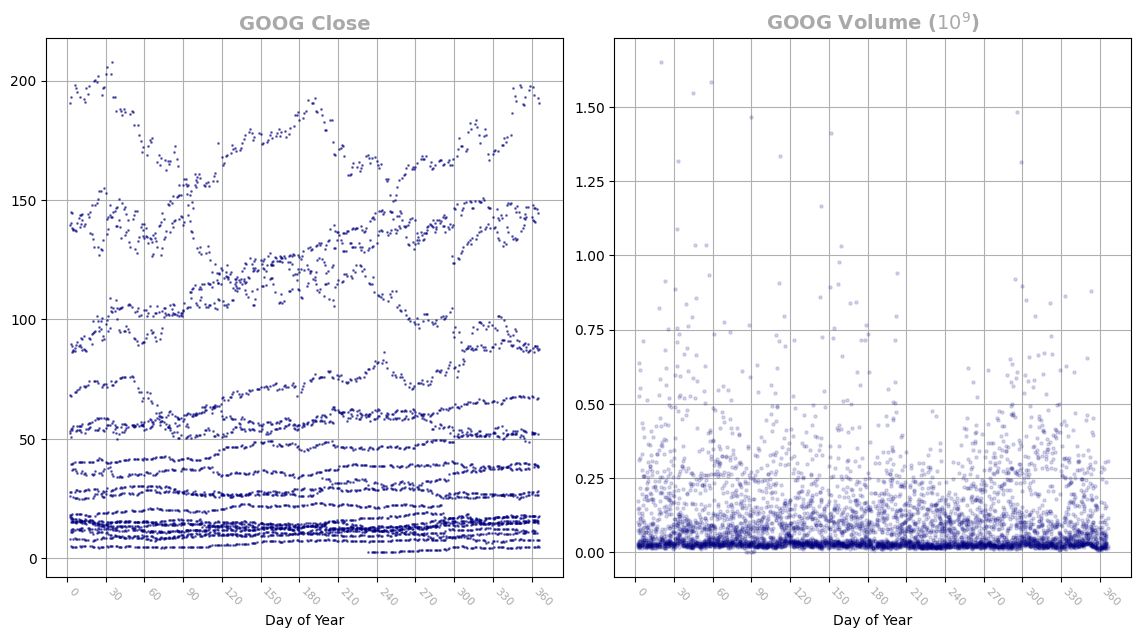

In [5]:
day_of_year = goog_df["DATETIME"].dt.dayofyear.to_numpy()
vol = goog_df["Volume"].to_numpy()
close = goog_df["Close"].to_numpy()
dates = goog_df["Date"].to_numpy()

fig = plt.figure(figsize=(14., 7.0))

ax_left = fig.add_subplot(1,2,1)
ax_left.set_title("GOOG Close", fontsize=14, fontweight="bold", color="darkgrey")
ax_left.scatter(day_of_year, close, s=1.0, color="navy", alpha=0.5)
ax_left.set_xticks(np.arange(365)[::30])
ax_left.set_xticklabels(np.arange(365)[::30], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_left.set_xlabel("Day of Year")
ax_left.grid()
ax_left.set_axisbelow(True)

ax_right = fig.add_subplot(1,2,2)
ax_right.set_title("GOOG Volume ($10^9$)", fontsize=14, fontweight="bold", color="darkgrey")
ax_right.scatter(day_of_year, vol * 1.0e-9, s=5.0, color="navy", alpha=0.15)
ax_right.set_xticks(np.arange(365)[::30])
ax_right.set_xticklabels(np.arange(365)[::30], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_right.set_xlabel("Day of Year")
ax_right.grid()
ax_right.set_axisbelow(True)

# ax_left.sharex(ax_right)
fig.subplots_adjust(wspace=0.1, hspace=0.0)

plt.show()

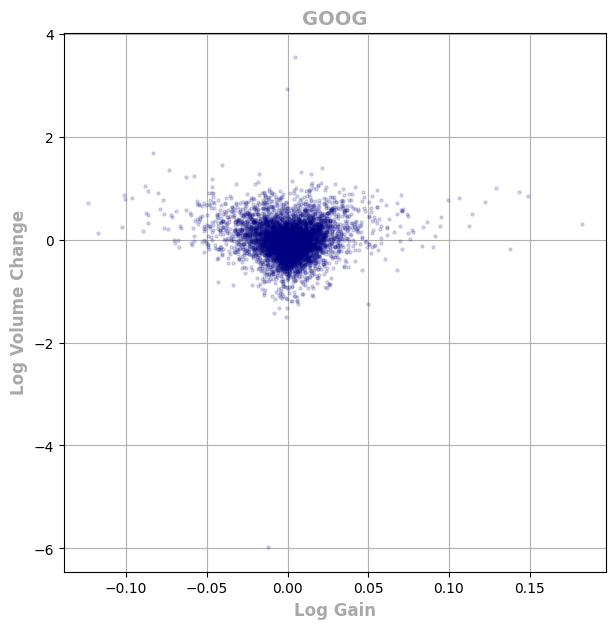

In [6]:
log_gain = np.log(close[1:] / close[:-1]) 
log_vol_change = np.log(vol[1:] / vol[:-1])

fig = plt.figure(figsize=(7.0, 7.0))

ax = fig.gca()
ax.set_title("GOOG", fontsize=14, fontweight="bold", color="darkgrey")
ax.set_xlabel("Log Gain", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_ylabel("Log Volume Change", fontsize=12, fontweight="bold", color="darkgrey")
ax.scatter(log_gain, log_vol_change, s=5.0, color="navy", alpha=0.15)
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [7]:
day = goog_df["Day"].to_numpy()
close = goog_df["Close"].to_numpy()
log_close = np.log(close)
dates = goog_df["Date"].to_numpy()

strt_date = "2010-01-01"
end_date =  "2020-01-01"
target_date = goog_df['Date'].iloc[-1]

strt_day_idx = goog_df.index[goog_df["DATETIME"] >= strt_date][0]
end_day_idx = goog_df.index[goog_df["DATETIME"] > end_date][0]
target_day_idx = goog_df.index[goog_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {goog_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {goog_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {goog_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2010-01-04
	End Date:    2020-01-02
	Target Date: 2025-04-11


In [8]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0004966
	Intercept:    5.1995471
	Est. Annual:  0.1986687
Ratio of Expected to Current:  1.1361368
Max Deviation:                 1.5488093

Projected Price:               181.1


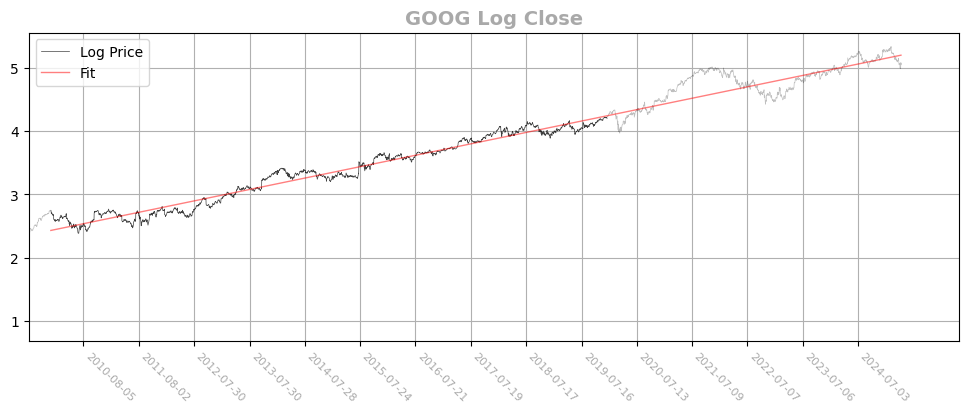

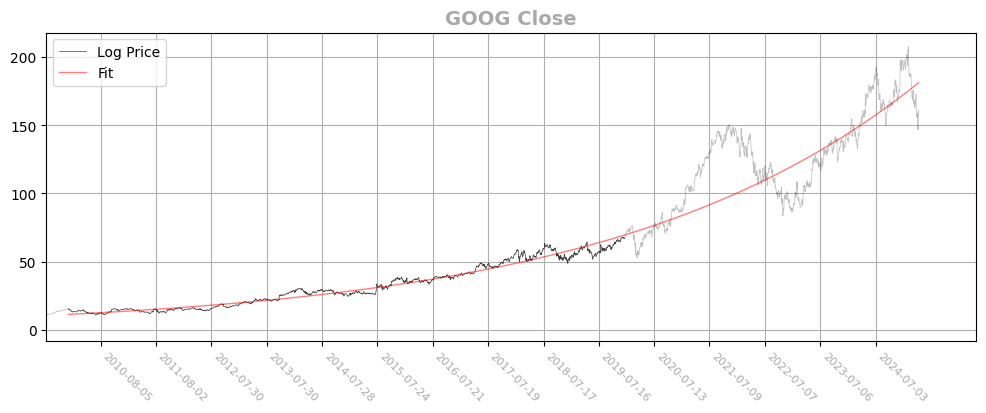

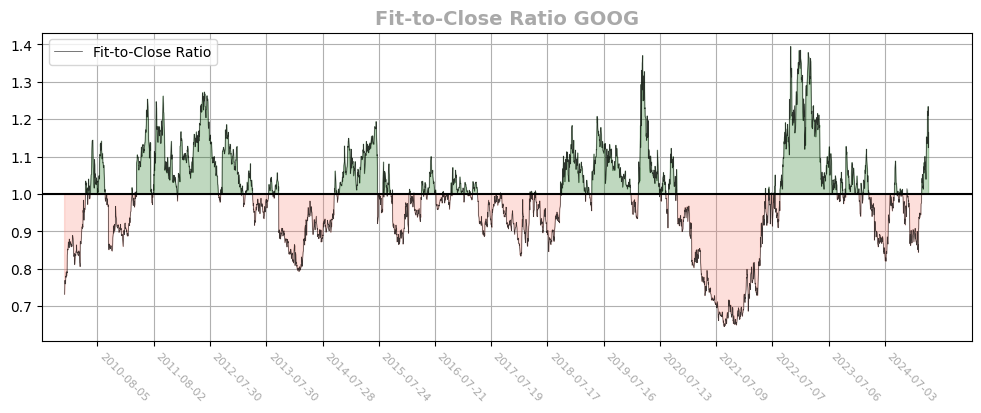

In [9]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("GOOG Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("GOOG Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio GOOG", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of the Log Returns:

Log Return Mean & STD :
 - Daily Mean:   0.000587 ± 0.0003053
 - Daily STD:    0.015314

Est. Annual Growth:  0.1083  to  0.3848


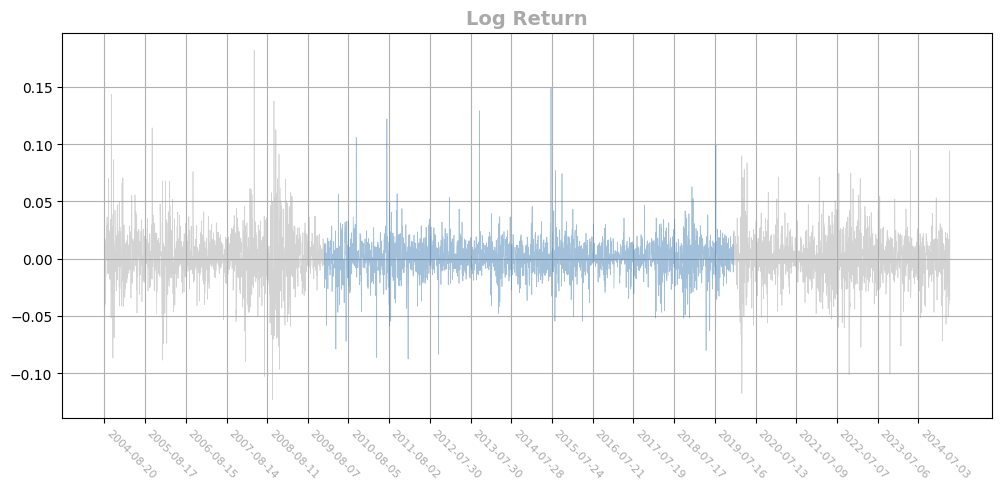

In [10]:
close = goog_df["Close"].to_numpy()
day = goog_df["Day"].to_numpy()[:-1]
dates = goog_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Daily Mean:  ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - Daily STD:   ", np.around(log_returns_in_range.std(), 7))
annual_low = np.power(1.0 + log_returns_in_range.mean() - est_err, 365) - 1.0
annual_high = np.power(1.0 + log_returns_in_range.mean() + est_err, 365) - 1.0
print("\nEst. Annual Growth: ", np.around(annual_low, 4), " to ", np.around(annual_high, 4))

fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

## Cummulative Gain During Period:

In [11]:
day = goog_df["Day"].to_numpy()
low = goog_df["Low"].to_numpy()
high = goog_df["High"].to_numpy()
close = goog_df["Close"].to_numpy()
dates = goog_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = goog_df['Date'].iloc[-1]

cumm_strt_day_idx = goog_df.index[goog_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = goog_df.index[goog_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = goog_df.index[goog_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {goog_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {goog_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {goog_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2025-04-11


In [12]:
# Compute number of shares if purchased daily with a fix amount:
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   2.021
	Max Gain at Target:   2.123
	Close Gain at Target: 2.093
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# NASDAQ-100

In [13]:
ndx_df = pd.read_csv("csv_files/NDX.csv")

display(ndx_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1,1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
2,1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
3,1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
4,1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
5,1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000
6,1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000
7,1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000
8,1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000
9,1985-10-14,111.050003,113.269997,111.050003,113.184998,113.184998,123120000


In [14]:
# Conver Date to DateTime Object:
ndx_df["DATETIME"] = pd.to_datetime(ndx_df["Date"], format="%Y-%m-%d")
ndx_df["Day"] = (ndx_df["DATETIME"] - ndx_df["DATETIME"].iloc[-1]).dt.days

display(ndx_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000,1985-10-01,-14437
1,1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,1985-10-02,-14436
2,1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,1985-10-03,-14435
3,1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,1985-10-04,-14434
4,1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,1985-10-07,-14431
5,1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000,1985-10-08,-14430
6,1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000,1985-10-09,-14429
7,1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000,1985-10-10,-14428
8,1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000,1985-10-11,-14427
9,1985-10-14,111.050003,113.269997,111.050003,113.184998,113.184998,123120000,1985-10-14,-14424


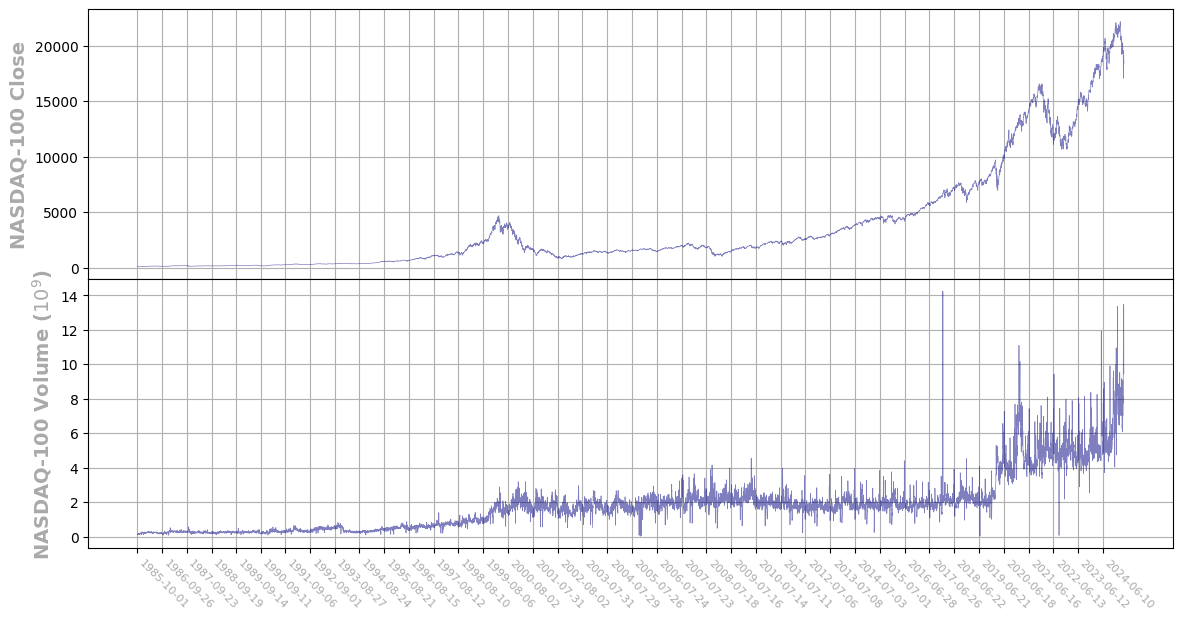

In [15]:
day = ndx_df["Day"].to_numpy()
close = ndx_df["Close"].to_numpy()
vol = ndx_df["Volume"].to_numpy()
dates = ndx_df["Date"].to_numpy()

fig = plt.figure(figsize=(14., 7.0))

ax_upper = fig.add_subplot(2,1,1)
ax_upper.set_ylabel("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax_upper.plot(day, close, lw=0.5, color="navy", alpha=0.5)
# ax_upper.set_xticks(day[::250])
ax_upper.set_xticklabels([]) # dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_upper.grid()
ax_upper.set_axisbelow(True)

ax_lower = fig.add_subplot(2,1,2)
ax_lower.set_ylabel("NASDAQ-100 Volume ($10^9$)", fontsize=14, fontweight="bold", color="darkgrey")
ax_lower.plot(day, vol * 1.0e-9, lw=0.5, color="navy", alpha=0.5)
ax_lower.set_xticks(day[::250])
ax_lower.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_lower.grid()
ax_lower.set_axisbelow(True)

ax_upper.sharex(ax_lower)
fig.subplots_adjust(wspace=0.1, hspace=0.0)

plt.show()

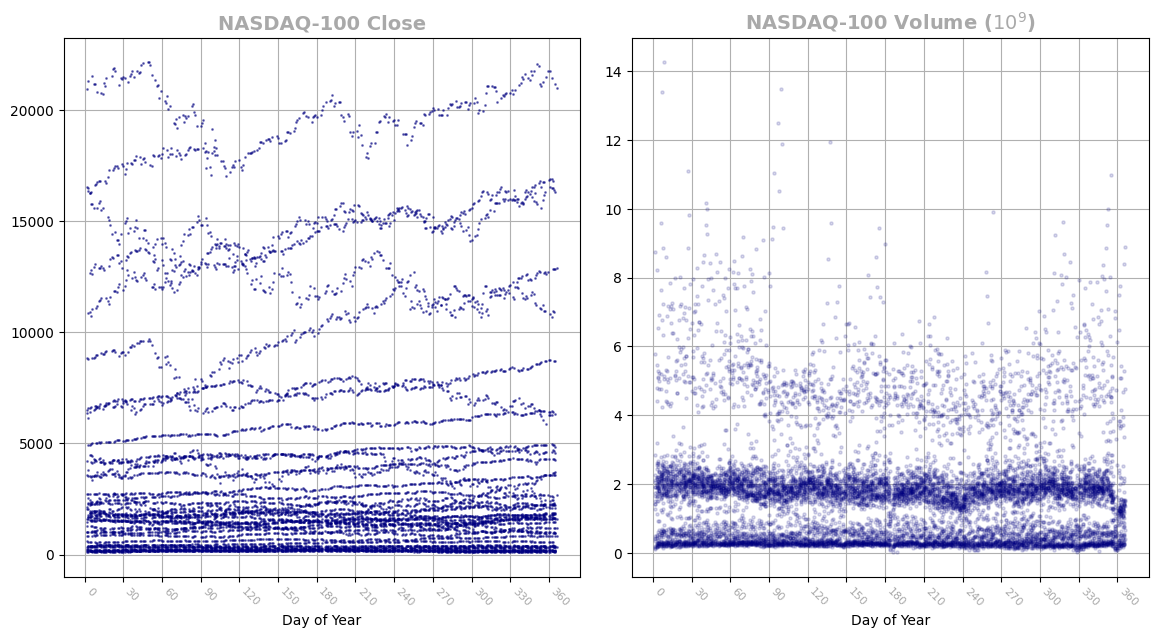

In [16]:
day_of_year = ndx_df["DATETIME"].dt.dayofyear.to_numpy()
vol = ndx_df["Volume"].to_numpy()
close = ndx_df["Close"].to_numpy()
dates = ndx_df["Date"].to_numpy()

fig = plt.figure(figsize=(14., 7.0))

ax_left = fig.add_subplot(1,2,1)
ax_left.set_title("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax_left.scatter(day_of_year, close, s=1.0, color="navy", alpha=0.5)
ax_left.set_xticks(np.arange(365)[::30])
ax_left.set_xticklabels(np.arange(365)[::30], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_left.set_xlabel("Day of Year")
ax_left.grid()
ax_left.set_axisbelow(True)

ax_right = fig.add_subplot(1,2,2)
ax_right.set_title("NASDAQ-100 Volume ($10^9$)", fontsize=14, fontweight="bold", color="darkgrey")
ax_right.scatter(day_of_year, vol * 1.0e-9, s=5.0, color="navy", alpha=0.15)
ax_right.set_xticks(np.arange(365)[::30])
ax_right.set_xticklabels(np.arange(365)[::30], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_right.set_xlabel("Day of Year")
ax_right.grid()
ax_right.set_axisbelow(True)

# ax_left.sharex(ax_right)
fig.subplots_adjust(wspace=0.1, hspace=0.0)

plt.show()

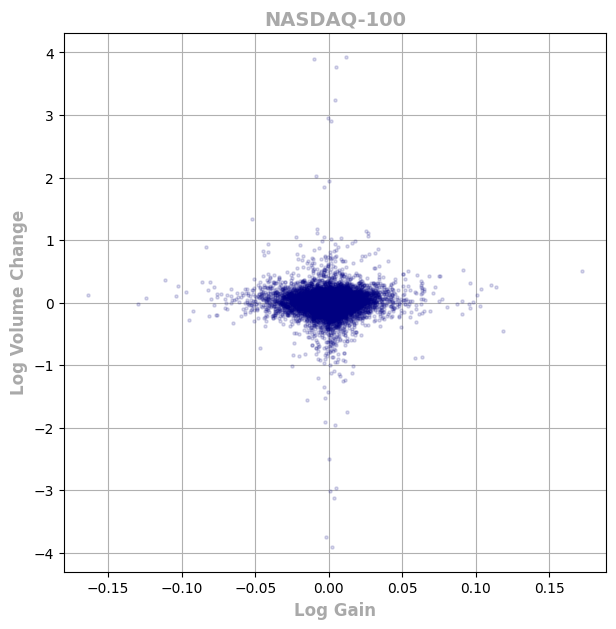

In [17]:
log_gain = np.log(close[1:] / close[:-1]) 
log_vol_change = np.log(vol[1:] / vol[:-1])

fig = plt.figure(figsize=(7.0, 7.0))

ax = fig.gca()
ax.set_title("NASDAQ-100", fontsize=14, fontweight="bold", color="darkgrey")
ax.set_xlabel("Log Gain", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_ylabel("Log Volume Change", fontsize=12, fontweight="bold", color="darkgrey")
ax.scatter(log_gain, log_vol_change, s=5.0, color="navy", alpha=0.15)
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [18]:
day = ndx_df["Day"].to_numpy()
close = ndx_df["Close"].to_numpy()
log_close = np.log(close)
dates = ndx_df["Date"].to_numpy()

strt_date = "2010-01-01"
end_date = "2020-01-01"
target_date = ndx_df['Date'].iloc[-1]

strt_day_idx = ndx_df.index[ndx_df["DATETIME"] >= strt_date][0]
end_day_idx = ndx_df.index[ndx_df["DATETIME"] > end_date][0]
target_day_idx = ndx_df.index[ndx_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {ndx_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {ndx_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {ndx_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2010-01-04
	End Date:    2020-01-02
	Target Date: 2025-04-11


In [19]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0004202
	Intercept:    9.8499629
	Est. Annual:  0.1657339
Ratio of Expected to Current:  1.0138917
Max Deviation:                 1.471452

Projected Price:               18949.687


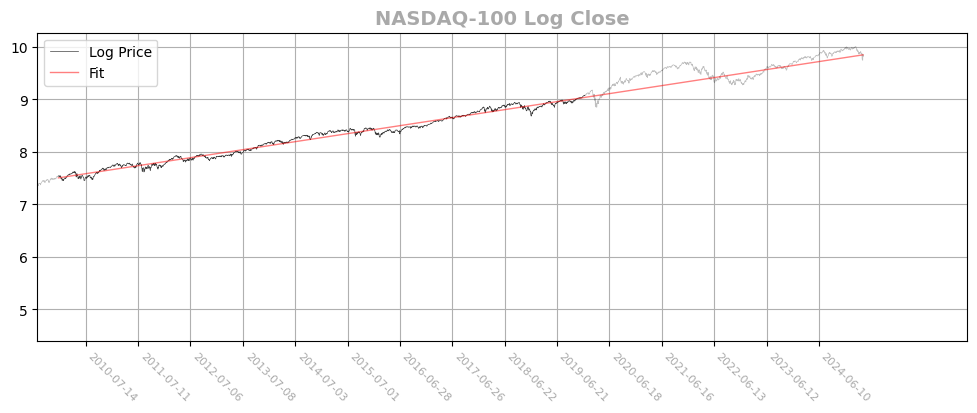

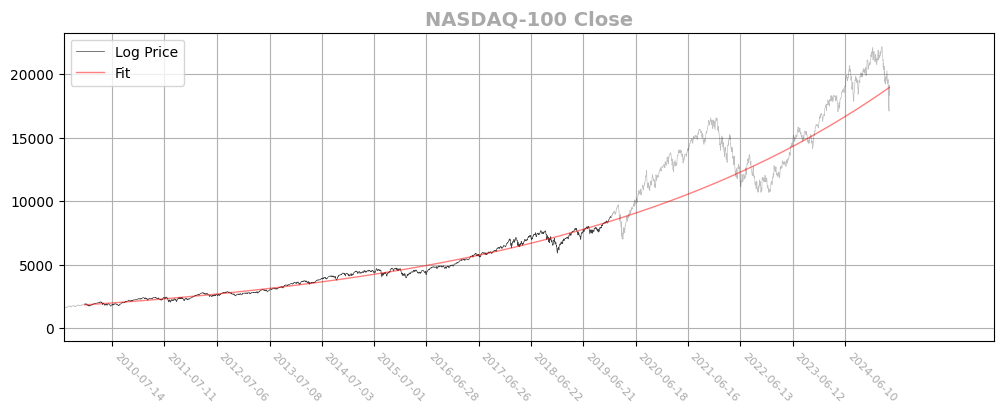

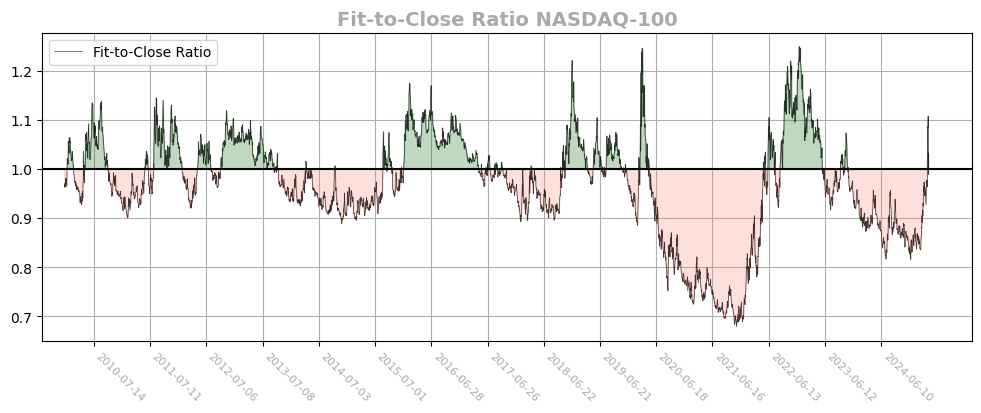

In [20]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("NASDAQ-100 Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio NASDAQ-100", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of the Log Returns:

Log Return Mean & STD :
 - Mean:  0.0006153 ± 0.0002177
 - STD:   0.0109214


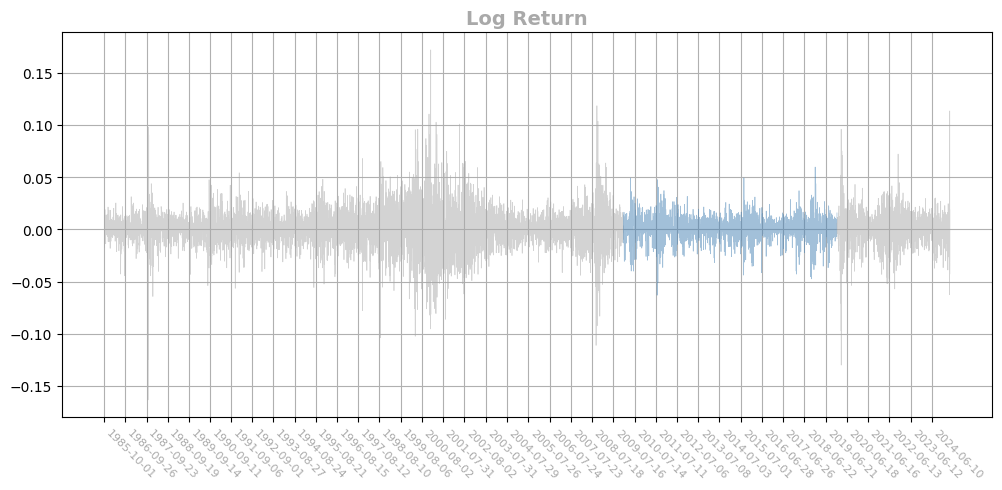

In [21]:
close = ndx_df["Close"].to_numpy()
day = ndx_df["Day"].to_numpy()[:-1]
dates = ndx_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))

fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

## Cummulative Gain During Period:

In [22]:
day = ndx_df["Day"].to_numpy()
low = ndx_df["Low"].to_numpy()
high = ndx_df["High"].to_numpy()
close = ndx_df["Close"].to_numpy()
dates = ndx_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = ndx_df['Date'].iloc[-1]

cumm_strt_day_idx = ndx_df.index[ndx_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = ndx_df.index[ndx_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = ndx_df.index[ndx_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {ndx_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {ndx_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {ndx_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2025-04-11


In [23]:
# Compute number of shares if purchased daily with a fix amount:
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.885
	Max Gain at Target:   1.978
	Close Gain at Target: 1.956
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# Dow Jones

In [24]:
dji_df = pd.read_csv("csv_files/DJI.csv")

display(dji_df.head(10))
display(len(dji_df.index))

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000
1,1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000
2,1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000
3,1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000
4,1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000
5,1992-01-09,3203.899902,3228.310059,3192.750000,3209.500000,3209.500000,29820000
6,1992-01-10,3209.500000,3217.129883,3185.379883,3199.500000,3199.500000,23440000
7,1992-01-13,3199.500000,3201.250000,3179.110107,3185.600098,3185.600098,19300000
8,1992-01-14,3185.600098,3248.879883,3182.919922,3246.199951,3246.199951,24220000
9,1992-01-15,3246.199951,3263.419922,3232.110107,3258.500000,3258.500000,29560000


8380

In [25]:
# Remove duplicates:
dji_df = dji_df.drop_duplicates("Date")
display(len(dji_df.index))

# Reset Index:
dji_df.reset_index(drop=True, inplace=True)

8380

In [26]:
# Conver Date to DateTime Object:
dji_df["DATETIME"] = pd.to_datetime(dji_df["Date"], format="%Y-%m-%d")
dji_df["Day"] = (dji_df["DATETIME"] - dji_df["DATETIME"].iloc[0]).dt.days

display(dji_df.head(10))
display(len(dji_df.index))

,Date,Open,High,Low,Close,Adj Close,Volume,DATETIME,Day
0,1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000,1992-01-02,0
1,1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000,1992-01-03,1
2,1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000,1992-01-06,4
3,1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000,1992-01-07,5
4,1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000,1992-01-08,6
5,1992-01-09,3203.899902,3228.310059,3192.750000,3209.500000,3209.500000,29820000,1992-01-09,7
6,1992-01-10,3209.500000,3217.129883,3185.379883,3199.500000,3199.500000,23440000,1992-01-10,8
7,1992-01-13,3199.500000,3201.250000,3179.110107,3185.600098,3185.600098,19300000,1992-01-13,11
8,1992-01-14,3185.600098,3248.879883,3182.919922,3246.199951,3246.199951,24220000,1992-01-14,12
9,1992-01-15,3246.199951,3263.419922,3232.110107,3258.500000,3258.500000,29560000,1992-01-15,13


8380

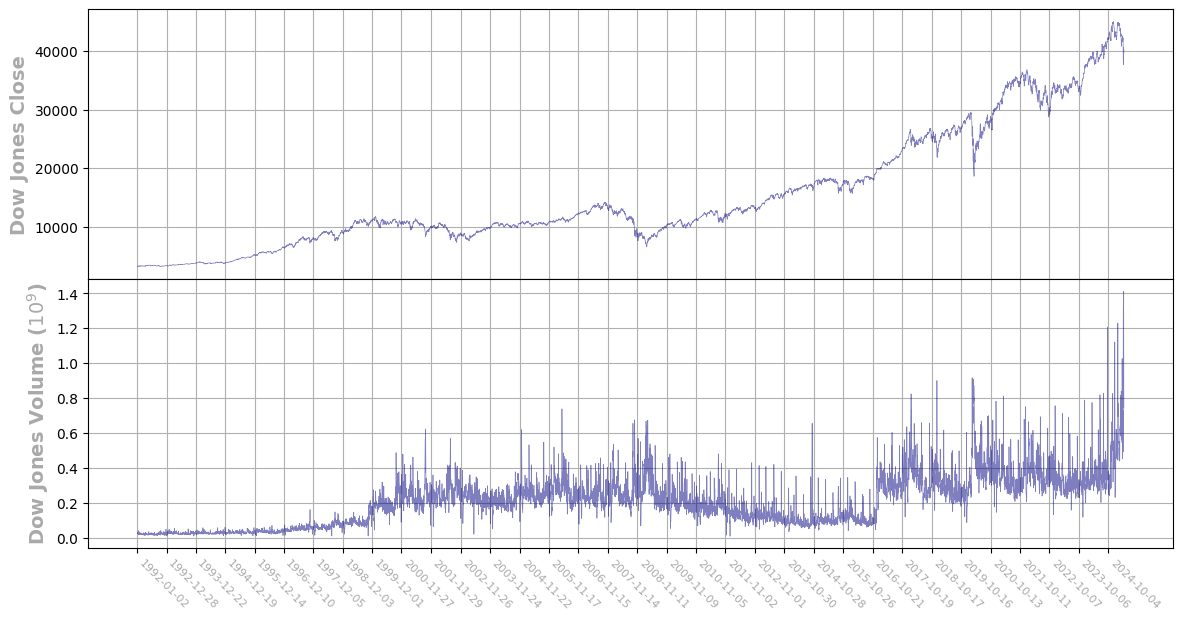

In [27]:
day = dji_df["Day"].to_numpy()
close = dji_df["Close"].to_numpy()
vol = dji_df["Volume"].to_numpy()
dates = dji_df["Date"].to_numpy()

fig = plt.figure(figsize=(14., 7.0))

ax_upper = fig.add_subplot(2,1,1)
ax_upper.set_ylabel("Dow Jones Close", fontsize=14, fontweight="bold", color="darkgrey")
ax_upper.plot(day, close, lw=0.5, color="navy", alpha=0.5)
# ax_upper.set_xticks(day[::250])
ax_upper.set_xticklabels([]) # dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_upper.grid()
ax_upper.set_axisbelow(True)

ax_lower = fig.add_subplot(2,1,2)
ax_lower.set_ylabel("Dow Jones Volume ($10^9$)", fontsize=14, fontweight="bold", color="darkgrey")
ax_lower.plot(day, vol * 1.0e-9, lw=0.5, color="navy", alpha=0.5)
ax_lower.set_xticks(day[::250])
ax_lower.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_lower.grid()
ax_lower.set_axisbelow(True)

ax_upper.sharex(ax_lower)
fig.subplots_adjust(wspace=0.1, hspace=0.0)

plt.show()

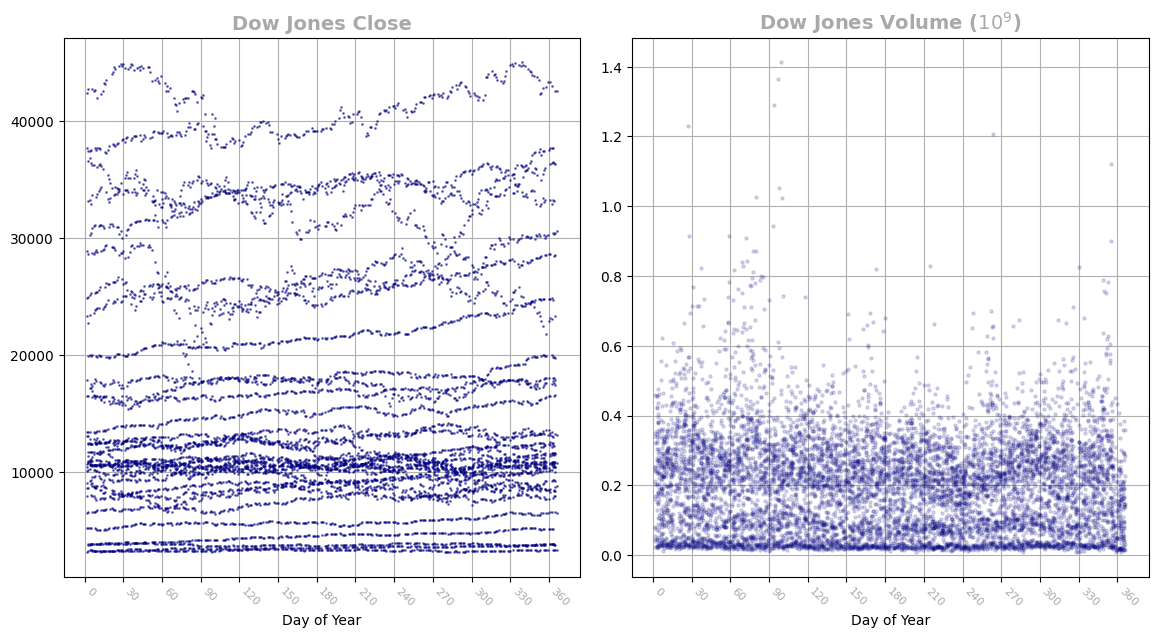

In [28]:
day_of_year = dji_df["DATETIME"].dt.dayofyear.to_numpy()
vol = dji_df["Volume"].to_numpy()
close = dji_df["Close"].to_numpy()
dates = dji_df["Date"].to_numpy()

fig = plt.figure(figsize=(14., 7.0))

ax_left = fig.add_subplot(1,2,1)
ax_left.set_title("Dow Jones Close", fontsize=14, fontweight="bold", color="darkgrey")
ax_left.scatter(day_of_year, close, s=1.0, color="navy", alpha=0.5)
ax_left.set_xticks(np.arange(365)[::30])
ax_left.set_xticklabels(np.arange(365)[::30], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_left.set_xlabel("Day of Year")
ax_left.grid()
ax_left.set_axisbelow(True)

ax_right = fig.add_subplot(1,2,2)
ax_right.set_title("Dow Jones Volume ($10^9$)", fontsize=14, fontweight="bold", color="darkgrey")
ax_right.scatter(day_of_year, vol * 1.0e-9, s=5.0, color="navy", alpha=0.15)
ax_right.set_xticks(np.arange(365)[::30])
ax_right.set_xticklabels(np.arange(365)[::30], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax_right.set_xlabel("Day of Year")
ax_right.grid()
ax_right.set_axisbelow(True)

# ax_left.sharex(ax_right)
fig.subplots_adjust(wspace=0.1, hspace=0.0)

plt.show()

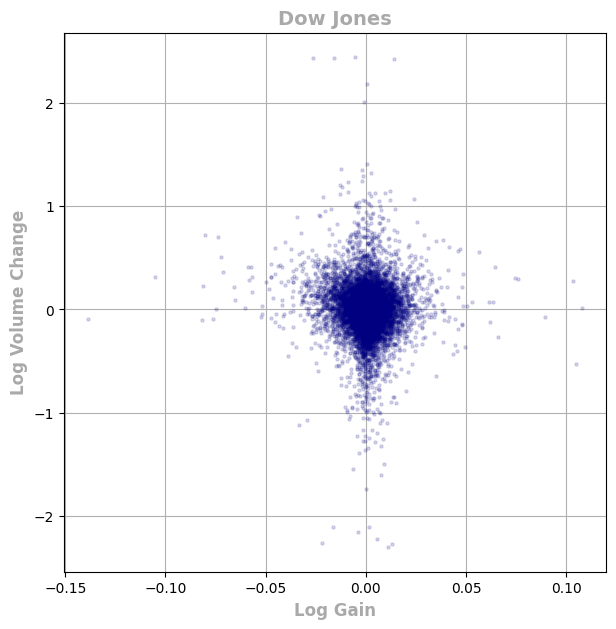

In [29]:
log_gain = np.log(close[1:] / close[:-1]) 
log_vol_change = np.log(vol[1:] / vol[:-1])

fig = plt.figure(figsize=(7.0, 7.0))

ax = fig.gca()
ax.set_title("Dow Jones", fontsize=14, fontweight="bold", color="darkgrey")
ax.set_xlabel("Log Gain", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_ylabel("Log Volume Change", fontsize=12, fontweight="bold", color="darkgrey")
ax.scatter(log_gain, log_vol_change, s=5.0, color="navy", alpha=0.15)
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [30]:
day = dji_df["Day"].to_numpy()
close = dji_df["Close"].to_numpy()
log_close = np.log(close)
dates = dji_df["Date"].to_numpy()

strt_date = "2013-01-01" #"2010-01-01"
end_date = "2025-01-01"
target_date = dji_df['Date'].iloc[-1]

strt_day_idx = dji_df.index[dji_df["DATETIME"] >= strt_date][0]
end_day_idx = dji_df.index[dji_df["DATETIME"] > end_date][0]
target_day_idx = dji_df.index[dji_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {dji_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {dji_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {dji_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2013-01-02
	End Date:    2025-01-02
	Target Date: 2025-04-11


In [31]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]


print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope:   ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx]-fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0002445
	Intercept:    7.6949907
	Est. Annual:  0.0933335
Ratio of Expected to Current:  1.0663107
Max Deviation:                 1.181079

Projected Price:               42879.241


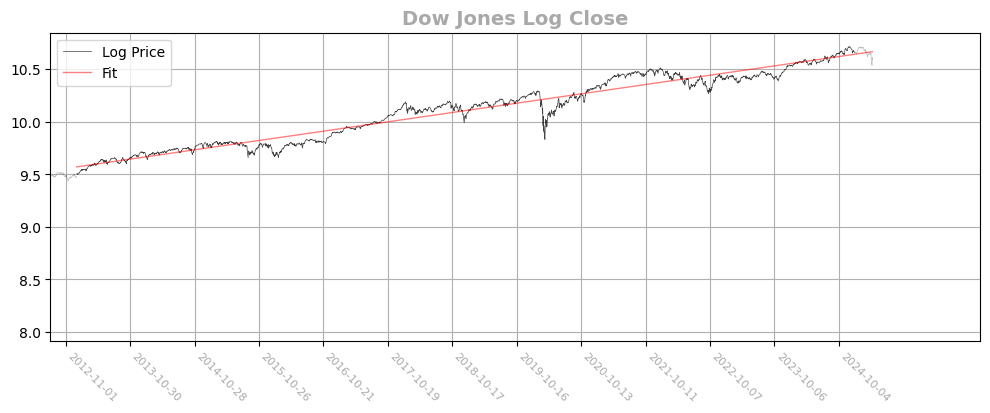

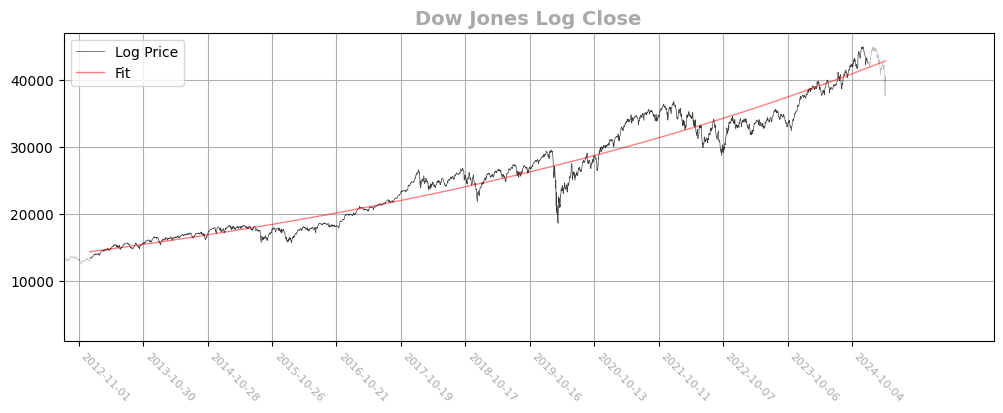

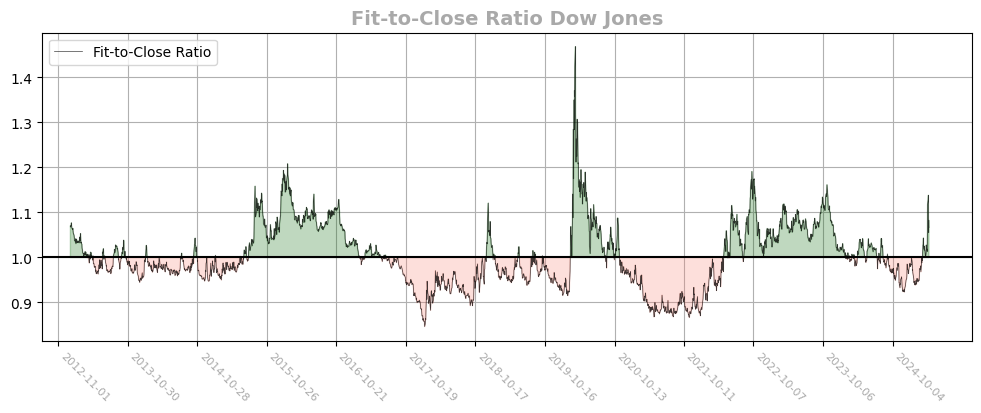

In [32]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Dow Jones Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Dow Jones Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio Dow Jones", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of Log Returns:

Log Return Mean & STD :
 - Mean:  0.0003811 ± 0.0001905
 - STD:   0.0104681


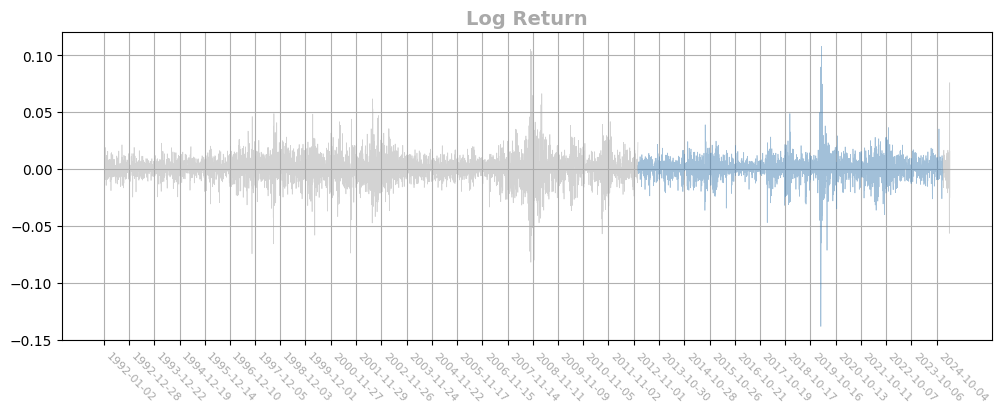

In [33]:
close = dji_df["Close"].to_numpy()
day = dji_df["Day"].to_numpy()[:-1]
dates = dji_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))


fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

In [34]:
strt_day_idx = 0
end_day_idx = -1

print("Dates:")
print(f"\tStart Date: {dji_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:   {dji_df['Date'].iloc[end_day_idx]}\n")

print("Log Return Mean & STD (ALL TIME):")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(f"\tMean: {np.around(log_returns_in_range.mean(), 7)}±{np.around(est_err, 7)}")
print(f"\tSTD:  {np.around(log_returns_in_range.std(), 7)}")

Dates:
	Start Date: 1992-01-02
	End Date:   2025-04-11

Log Return Mean & STD (ALL TIME):
	Mean: 0.0003013±0.0001206
	STD:  0.0110366


## Cummulative Gain During Period:

In [35]:
day = dji_df["Day"].to_numpy()
low = dji_df["Low"].to_numpy()
high = dji_df["High"].to_numpy()
close = dji_df["Close"].to_numpy()
dates = dji_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = dji_df['Date'].iloc[-1]

cumm_strt_day_idx = dji_df.index[dji_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = dji_df.index[dji_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = dji_df.index[dji_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {dji_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {dji_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {dji_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2025-04-11


In [36]:
# Compute number of shares if purchased daily with a fix amount:
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.368
	Max Gain at Target:   1.427
	Close Gain at Target: 1.411
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# S&P 500

In [37]:
sp500_df = pd.read_csv("csv_files/WSJ_SP500.csv")

display(sp500_df.head(10))

,Date,Open,High,Low,Close
0,04/11/25,5255.56,5381.46,5220.77,5363.36
1,04/10/25,5353.15,5353.15,5115.27,5268.05
2,04/09/25,4965.28,5481.34,4948.43,5456.90
3,04/08/25,5193.57,5267.47,4910.42,4982.77
4,04/07/25,4953.79,5246.57,4835.04,5062.25
5,04/04/25,5292.14,5292.14,5069.90,5074.08
6,04/03/25,5492.74,5499.53,5390.83,5396.52
7,04/02/25,5580.76,5695.31,5571.48,5670.97
8,04/01/25,5597.53,5650.57,5558.52,5633.07
9,03/31/25,5527.91,5627.56,5488.73,5611.85


In [38]:
# We need ascending order:
sp500_df = sp500_df.iloc[::-1]

# Remove duplicates:
sp500_df = sp500_df.drop_duplicates("Date")
display(len(sp500_df.index))

# Reset Index:
sp500_df.reset_index(drop=True, inplace=True)

8886

In [39]:
# Conver Date to DateTime Object:
sp500_df["DATETIME"] = pd.to_datetime(sp500_df["Date"], format="%m/%d/%y")
sp500_df["Day"] = (sp500_df["DATETIME"] - sp500_df["DATETIME"].iloc[0]).dt.days

sp500_df.rename(columns={c: c.replace(" ","") for c in sp500_df.columns}, inplace = True)

display(sp500_df.head(10))

,Date,Open,High,Low,Close,DATETIME,Day
0,01/02/90,359.69,359.69,351.98,359.69,1990-01-02,0
1,01/03/90,358.76,360.59,357.89,358.76,1990-01-03,1
2,01/04/90,355.67,358.76,352.89,355.67,1990-01-04,2
3,01/05/90,352.20,355.67,351.35,352.20,1990-01-05,3
4,01/08/90,353.79,354.24,350.54,353.79,1990-01-08,6
5,01/09/90,349.62,354.17,349.61,349.62,1990-01-09,7
6,01/10/90,347.31,349.62,344.32,347.31,1990-01-10,8
7,01/11/90,348.53,350.14,347.31,348.53,1990-01-11,9
8,01/12/90,339.93,348.53,339.49,339.93,1990-01-12,10
9,01/15/90,337.00,339.94,336.57,337.00,1990-01-15,13


In [40]:
# Adjust the "Date" format:
sp500_df["Date"] = sp500_df["DATETIME"].dt.strftime("%Y-%m-%d")

display(sp500_df.head(10))

,Date,Open,High,Low,Close,DATETIME,Day
0,1990-01-02,359.69,359.69,351.98,359.69,1990-01-02,0
1,1990-01-03,358.76,360.59,357.89,358.76,1990-01-03,1
2,1990-01-04,355.67,358.76,352.89,355.67,1990-01-04,2
3,1990-01-05,352.20,355.67,351.35,352.20,1990-01-05,3
4,1990-01-08,353.79,354.24,350.54,353.79,1990-01-08,6
5,1990-01-09,349.62,354.17,349.61,349.62,1990-01-09,7
6,1990-01-10,347.31,349.62,344.32,347.31,1990-01-10,8
7,1990-01-11,348.53,350.14,347.31,348.53,1990-01-11,9
8,1990-01-12,339.93,348.53,339.49,339.93,1990-01-12,10
9,1990-01-15,337.00,339.94,336.57,337.00,1990-01-15,13


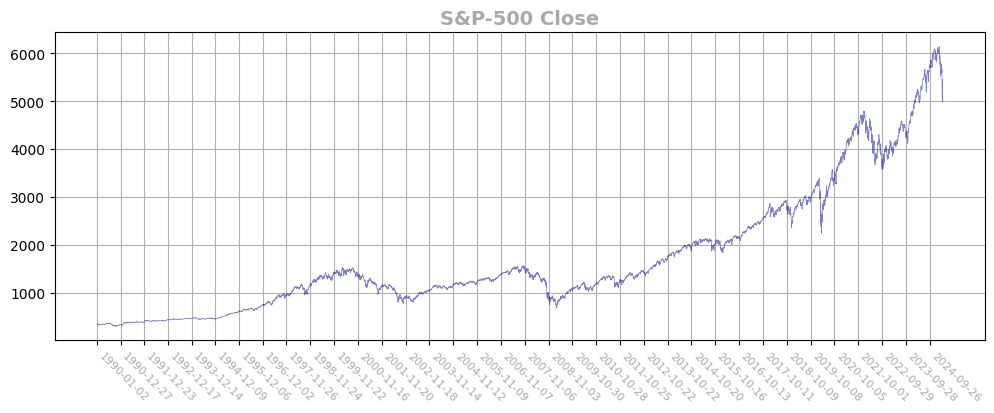

In [41]:
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()

day = sp500_df["Day"].to_numpy()
close = sp500_df["Close"].to_numpy()
dates = sp500_df["Date"].to_numpy()

ax.set_title("S&P-500 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

## Fit to Historical Close Prices:

In [42]:
day = sp500_df["Day"].to_numpy()
close = sp500_df["Close"].to_numpy()
log_close = np.log(close)
dates = sp500_df["Date"].to_numpy()

strt_date = "2014-01-01"
end_date = "2020-01-01"
target_date = sp500_df['Date'].iloc[-1]

strt_day_idx = sp500_df.index[sp500_df["DATETIME"] >= strt_date][0]
end_day_idx = sp500_df.index[sp500_df["DATETIME"] > end_date][0]
target_day_idx = sp500_df.index[sp500_df["DATETIME"] >= target_date][0]

print("Dates:")
print(f"\tStart Date:  {sp500_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {sp500_df['Date'].iloc[end_day_idx]}")
print(f"\tTarget Date: {sp500_df['Date'].iloc[target_day_idx]}")

Dates:
	Start Date:  2014-01-02
	End Date:    2020-01-02
	Target Date: 2025-04-11


In [43]:
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]


print("\tSlope:       ", np.around(fit_results[0], 7))
print("\tIntercept:   ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
print("\tEst. Annual: ", np.around(np.power(1.0 + fit_results[0], 365) - 1.0, 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

print("\nProjected Price:              ", np.around(np.exp(fit_points[-1]), 3))

	Slope:        0.0002408
	Intercept:    5.381726
	Est. Annual:  0.0918589
Ratio of Expected to Current:  0.9015625
Max Deviation:                 1.322832

Projected Price:               4835.404


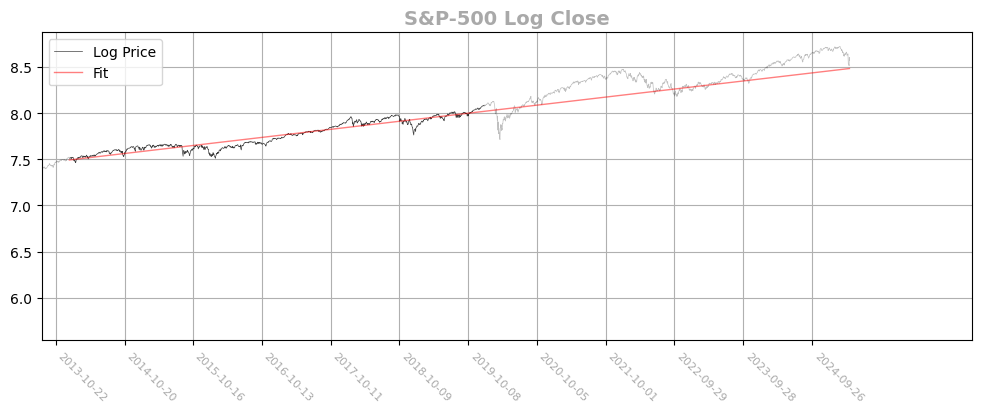

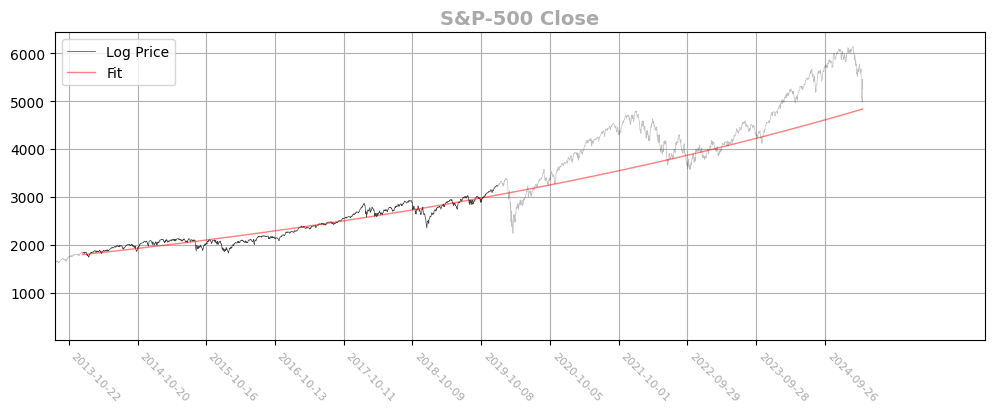

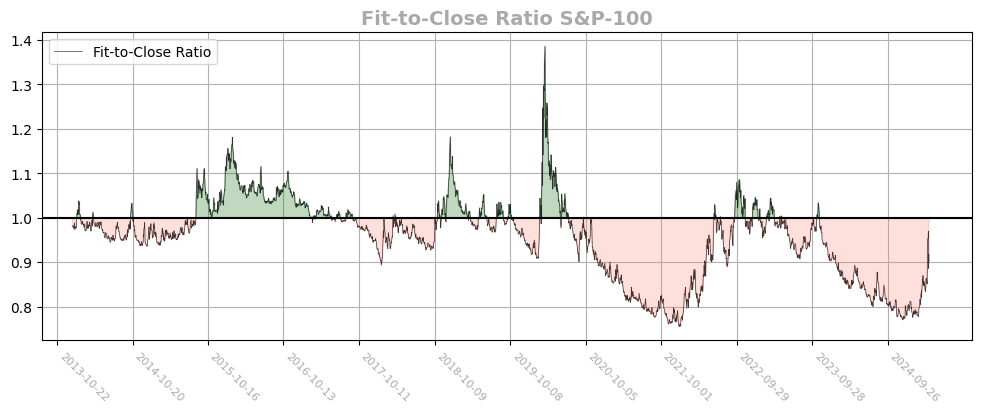

In [44]:
## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("S&P-500 Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("S&P-500 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio S&P-100", fontsize=14, fontweight="bold", color="darkgrey")
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="darkgreen", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

## Simple Averaging of Log Returns:

Log Return Mean & STD :
 - Mean:  0.0003812 ± 0.0002127
 - STD:   0.0082668


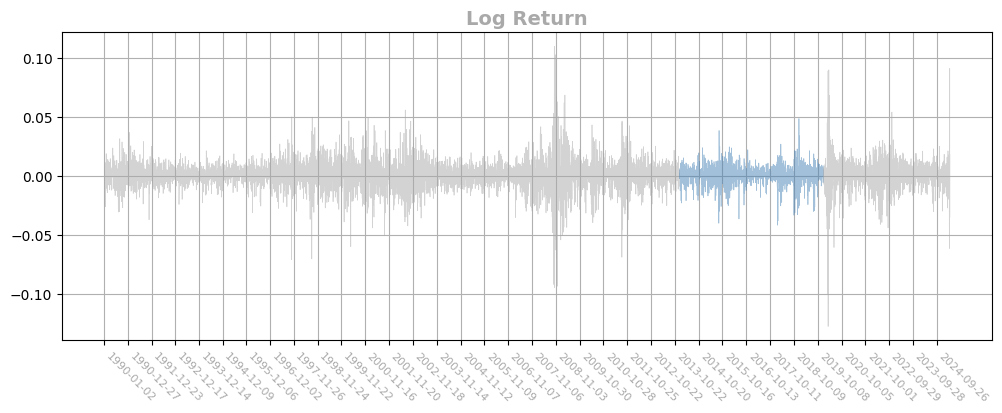

In [45]:
close = sp500_df["Close"].to_numpy()
day = sp500_df["Day"].to_numpy()[:-1]
dates = sp500_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))


fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

In [46]:
strt_day_idx = 0
end_day_idx = -1

print("Dates:")
print(f"\tStart Date: {sp500_df['Date'].iloc[strt_day_idx]}")
print(f"\tEnd Date:   {sp500_df['Date'].iloc[end_day_idx]}\n")

print("Log Return Mean & STD (ALL TIME):")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(f"\tMean: {np.around(log_returns_in_range.mean(), 7)}±{np.around(est_err, 7)}")
print(f"\tSTD:  {np.around(log_returns_in_range.std(), 7)}")

Dates:
	Start Date: 1990-01-02
	End Date:   2025-04-11

Log Return Mean & STD (ALL TIME):
	Mean: 0.0003021±0.0001214
	STD:  0.011442


## Cummulative Gain During Period:

In [47]:
day = sp500_df["Day"].to_numpy()
low = sp500_df["Low"].to_numpy()
high = sp500_df["High"].to_numpy()
close = sp500_df["Close"].to_numpy()
dates = sp500_df["Date"].to_numpy()

cumm_strt_date = "2018-01-01"
cumm_end_date =  "2023-01-01"
cumm_target_date = sp500_df['Date'].iloc[-1]

cumm_strt_day_idx = sp500_df.index[sp500_df["DATETIME"] >= cumm_strt_date][0]
cumm_end_day_idx = sp500_df.index[sp500_df["DATETIME"] > cumm_end_date][0]
cumm_target_day_idx = sp500_df.index[sp500_df["DATETIME"] >= cumm_target_date][0]

print("Dates:")
print(f"\tStart Date:  {sp500_df['Date'].iloc[cumm_strt_day_idx]}")
print(f"\tEnd Date:    {sp500_df['Date'].iloc[cumm_end_day_idx]}")
print(f"\tTarget Date: {sp500_df['Date'].iloc[cumm_target_day_idx]}")

Dates:
	Start Date:  2018-01-02
	End Date:    2023-01-03
	Target Date: 2025-04-11


In [48]:
# Compute number of shares if purchased daily with a fix amount:
low_num_shares = np.sum(1.0 / high[cumm_strt_day_idx:cumm_end_day_idx])
high_num_shares = np.sum(1.0 / low[cumm_strt_day_idx:cumm_end_day_idx])
close_num_shares = np.sum(1.0 / close[cumm_strt_day_idx:cumm_end_day_idx])

num_days = cumm_end_day_idx - cumm_strt_day_idx
min_period_gain = low[cumm_target_day_idx] * low_num_shares / num_days
max_period_gain = high[cumm_target_day_idx] * high_num_shares / num_days
close_period_gain = close[cumm_target_day_idx] * close_num_shares / num_days

print(f"\tMin Gain at Target:   {np.around(min_period_gain, 3)}")
print(f"\tMax Gain at Target:   {np.around(max_period_gain, 3)}")
print(f"\tClose Gain at Target: {np.around(close_period_gain, 3)}")

annual_inflation_rate = 3.5
inflation = np.power(1.0 + 0.01 * annual_inflation_rate, num_days / 365)
print(f"\tInflation (at {annual_inflation_rate}% annual rate): {np.round(inflation, 2)}")

	Min Gain at Target:   1.56
	Max Gain at Target:   1.629
	Close Gain at Target: 1.613
	Inflation (at 3.5% annual rate): 1.13


</br></br></br>

--------------------

</br>

# Correlation Coefficient

In [49]:
strt_date = "2013-01-01"
end_date = "2025-01-01"

In [50]:
# GOOG
goog_strt_idx = goog_df.index[goog_df["DATETIME"] >= strt_date][0]
goog_end_idx = goog_df.index[goog_df["DATETIME"] > end_date][0]
goog_close = goog_df["Close"].to_numpy()[goog_strt_idx:goog_end_idx]
goog_dates = goog_df["Date"].to_numpy()[goog_strt_idx:goog_end_idx]
goog_log_return = np.log(goog_close[1:] / goog_close[:-1])
print("GOOG:  ", goog_dates.shape, goog_dates[0], goog_dates[-1])

# NDX
ndx_strt_idx = ndx_df.index[ndx_df["DATETIME"] >= strt_date][0]
ndx_end_idx = ndx_df.index[ndx_df["DATETIME"] > end_date][0]
ndx_close = ndx_df["Close"].to_numpy()[ndx_strt_idx:ndx_end_idx]
ndx_dates = ndx_df["Date"].to_numpy()[ndx_strt_idx:ndx_end_idx]
ndx_log_return = np.log(ndx_close[1:] / ndx_close[:-1])
print("NDX:   ", ndx_dates.shape, ndx_dates[0], ndx_dates[-1])

# DJI
dji_strt_idx = dji_df.index[dji_df["DATETIME"] >= strt_date][0]
dji_end_idx = dji_df.index[dji_df["DATETIME"] > end_date][0]
dji_close = dji_df["Close"].to_numpy()[dji_strt_idx:dji_end_idx]
dji_dates = dji_df["Date"].to_numpy()[dji_strt_idx:dji_end_idx]
dji_log_return = np.log(dji_close[1:] / dji_close[:-1])
print("DJI:   ", dji_dates.shape, dji_dates[0], dji_dates[-1])

# SP500
sp500_strt_idx = sp500_df.index[sp500_df["DATETIME"] >= strt_date][0]
sp500_end_idx = sp500_df.index[sp500_df["DATETIME"] > end_date][0]
sp500_close = sp500_df["Close"].to_numpy()[sp500_strt_idx:sp500_end_idx]
sp500_dates = sp500_df["Date"].to_numpy()[sp500_strt_idx:sp500_end_idx]
sp500_log_return = np.log(sp500_close[1:] / sp500_close[:-1])
print("SP500: ", sp500_dates.shape, sp500_dates[0], sp500_dates[-1])

GOOG:   (3020,) 2013-01-02 2024-12-31
NDX:    (3020,) 2013-01-02 2024-12-31
DJI:    (3020,) 2013-01-02 2024-12-31
SP500:  (3020,) 2013-01-02 2024-12-31


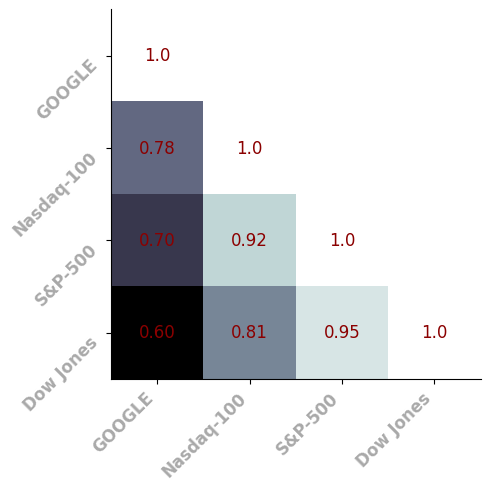

In [51]:
labels = ["GOOGLE", "Nasdaq-100", "S&P-500", "Dow Jones"]
a = np.stack(
    [goog_log_return, ndx_log_return, sp500_log_return, dji_log_return], 
    axis=0)
# print(a.shape, a.dtype)

corr_coef = np.corrcoef(a)
# print(corr_coef)

# Construct a mask
dim_0, dim_1 = corr_coef.shape[0], corr_coef.shape[1]
mask = np.arange(corr_coef.size)
mask = np.where(mask // dim_0 < mask % dim_1, True, False)

# Mask array
masked_corr_coef = np.ma.masked_array(corr_coef, mask)
plt.gca().spines[['right', 'top']].set_visible(False)

plt.imshow(masked_corr_coef, cmap="bone")
plt.xticks(np.arange(len(labels)), labels, 
           color="darkgray", fontsize=12, fontweight="bold",
           rotation=45, ha="right", va="top")
plt.yticks(np.arange(len(labels)), labels, 
           color="darkgray", fontsize=12, fontweight="bold",
           rotation=45, ha="right", va="top")
for x in range(len(labels)):
    for y in range(len(labels)):
        if x > y:
            continue
        plt.text(x, y, f"{str(float(corr_coef[x,y])):.4}", 
                 color="darkred", fontsize=12, fontweight="normal", 
                 ha="center", va="center")
plt.show()